The IBM HR Analysis Attrition helps us understand the organizational structure. This data set is intriguing and essential because employee attrition is a major concern in the corporate world. It covers the importance of employee attrition in the workplace and reasons employees leave companies. In this project we help HR personals and managers create a more stable environment and retain employees. In this data set our hypothesis is younger employees at the of 35 and younger are prone to attrition than older employees above the age of 35. This data was collected from Kaggle. IBM HR Analytics Employee Attrition & Performance. The data contains 35 variables and 1,470 observers. Fortunately, there are no missing values.

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
employeesDf = pd.read_csv('Attrition.csv')
employeesDf.info()
employeesDf.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employeesDf.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
employeesDf.shape

(1470, 35)

In [5]:
employeesDf.drop(columns=['EmployeeCount', 'EmployeeNumber','Over18','StockOptionLevel',
                          'EnvironmentSatisfaction','NumCompaniesWorked','Department',
                          'StandardHours','WorkLifeBalance','EducationField','Education','OverTime',
                          'YearsSinceLastPromotion','PerformanceRating','BusinessTravel',
                          'RelationshipSatisfaction','TrainingTimesLastYear','YearsInCurrentRole','PercentSalaryHike',
                          'JobRole','JobInvolvement','JobSatisfaction','MonthlyRate'], axis=1, inplace=True)

In [6]:
employeesDf.head()


,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,JobLevel,MaritalStatus,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,41,Yes,1102,1,Female,94,2,Single,5993,8,6,5
1,49,No,279,8,Male,61,2,Married,5130,10,10,7
2,37,Yes,1373,2,Male,92,1,Single,2090,7,0,0
3,33,No,1392,3,Female,56,1,Married,2909,8,8,0
4,27,No,591,2,Male,40,1,Married,3468,6,2,2


In [7]:
employeesDf.shape

(1470, 12)

# 1) What are some factors that lead to employee attrition?

In [8]:
employeesDf.groupby(['Attrition']).agg(['count'])

,Age,DailyRate,DistanceFromHome,Gender,HourlyRate,JobLevel,MaritalStatus,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
,count,count,count,count,count,count,count,count,count,count,count
Attrition,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,237


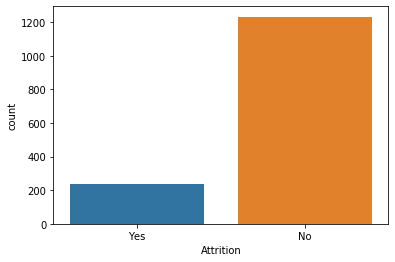

In [9]:
sns.countplot(employeesDf['Attrition'])
plt.show()

The above countplot displays the blue graph are employees who decided to be attrition and the orange are employees who remained with the organization.

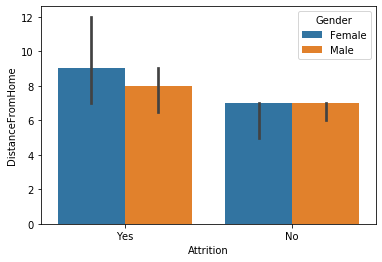

In [10]:
from numpy import median
sns.barplot(x='Attrition', y='DistanceFromHome', hue= 'Gender',data=employeesDf, estimator=median)
plt.show()

The above barplot shows on average males and females who live farther from home are prone to attrition than those lives near their work. Females who are attrition on average lives further than men. According to the graph, employees who stayed with the company on average lives same amount of distance from work.

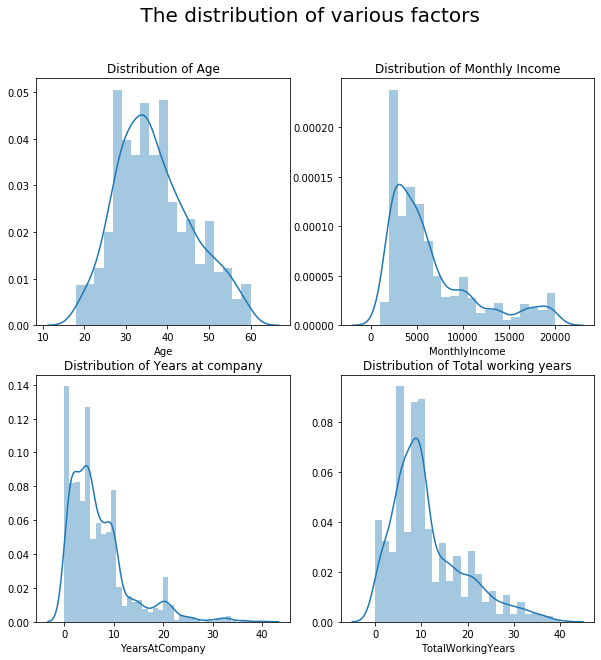

In [11]:
fig,ax = plt.subplots(2,2, figsize=(10,10))      # 'ax' has references to all the four axes
plt.suptitle(" The distribution of various factors", fontsize=20)
sns.distplot(usEducation.['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age')
sns.distplot(employeesDf['MonthlyIncome'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Monthly Income')
sns.distplot(employeesDf['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(employeesDf['TotalWorkingYears'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of Total working years')
plt.show()


Looking at the four Distributions of common factors that potentially leads to employee attrition. 
Age: shows a even/normal distribution, 
Monthly Income: shows a right skewed indicating most of data falls to the left of the graph. More employees earn less than 10,000 a month.
More imployees earn less than 10,000 monthly.
Years at company: is also right skewed indicating more employees have been at the company for less than 10 years
Total working years: This distribution is also right skewed with more employees having less than 15 years working


# 2. Are single employee on average more likely to be attrition and leave the company than married/divorce employees?

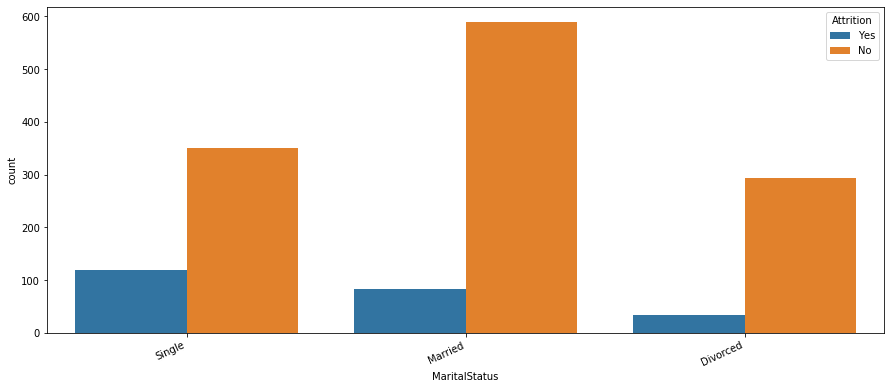

In [12]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='MaritalStatus',hue='Attrition', data=employeesDf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right" )
plt.show()


The above graph shows that single employees are more likly to leave the company than married or divorce employees.

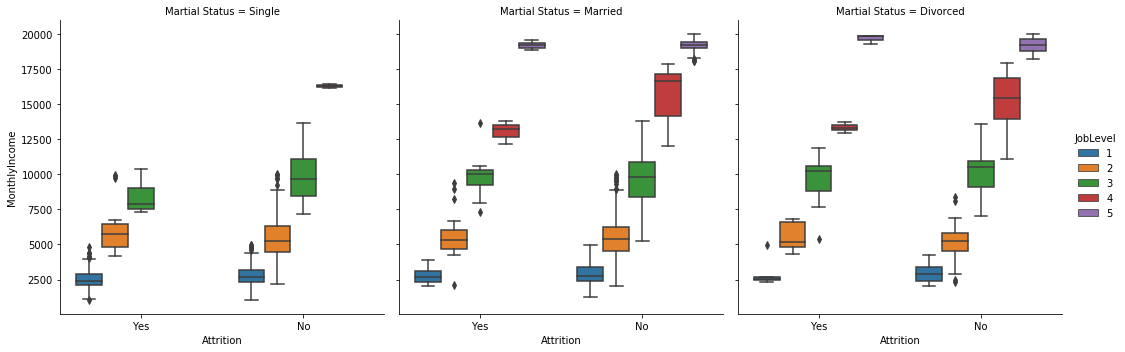

In [13]:
employeesDf['Martial Status'] = pd.cut(employeesDf['Age'], 3, labels=['Single', 'Married', 'Divorced'])
sns.catplot(x =   'Attrition',  y =   'MonthlyIncome',   hue = 'JobLevel',col = 'Martial Status', kind = 'box', data = employeesDf)
plt.show()

The above cat plot shows that single employees tend to leave the company compared to divorced and married employees. The monthly income also plays an important role in retaining employees in an organization. Never the less most single employees are at low job level and they tend to be attrition than higher job level employees.


# 3. Does years spent with managers have an impact on employees’s departure?

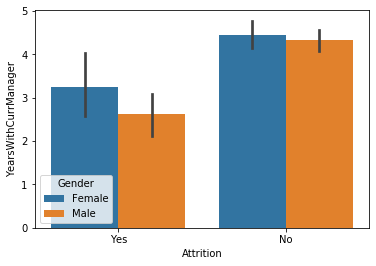

In [14]:
# More years spend with current manager leads to employee retaining. 
sns.barplot(x='Attrition', y='YearsWithCurrManager', hue= 'Gender',data=employeesDf )
plt.show()

Text(0, 0.5, 'Hourly Rate')

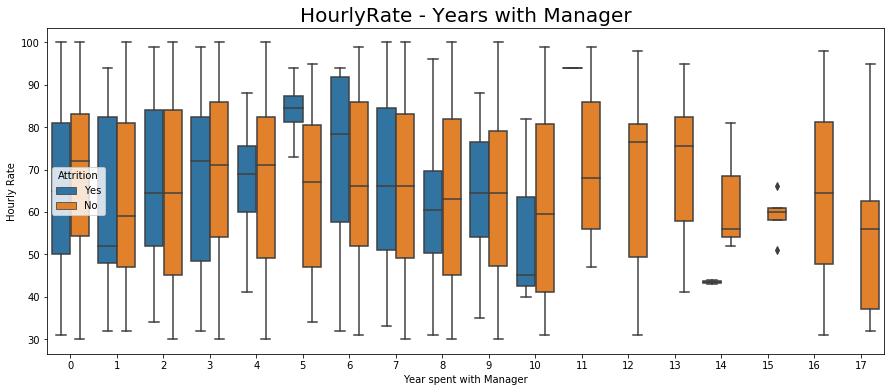

In [15]:
fig = plt.figure(figsize=(15,6))
sns.boxplot(x="YearsWithCurrManager",y="HourlyRate",data=employeesDf, hue="Attrition")
plt.title("HourlyRate - Years with Manager", fontsize=20)
plt.xlabel("Year spent with Manager", fontsize=10)
plt.ylabel("Hourly Rate", fontsize=10)

From the boxplot above we can conclude that more years spend with manager result in employees staying with the company and shorter years spent with managers leads to attrintion.

# 4) Do employees with less than ten years of experience on average tend to be attrition than those with ten years plus?

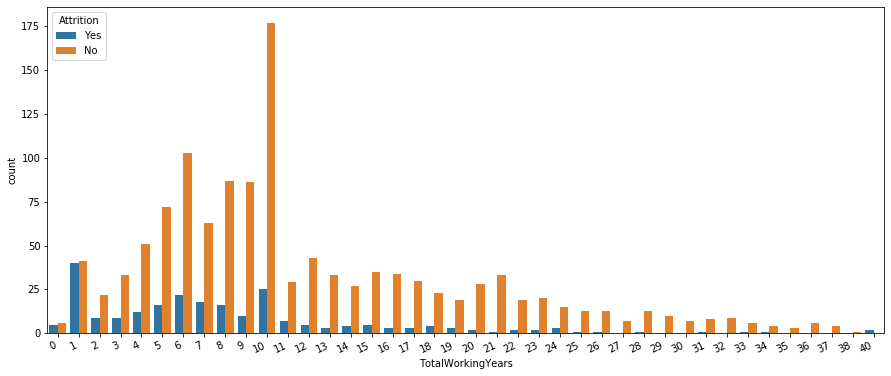

In [16]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='TotalWorkingYears',hue='Attrition', data=employeesDf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right" )
plt.show()

The above count plot shows that on average employees with 10 working years of experience and more tend to stay with company longer.

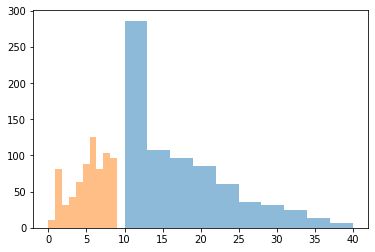

In [17]:
tenYearsPlus = employeesDf[employeesDf['TotalWorkingYears']>=10]

belowTenYears= employeesDf[employeesDf['TotalWorkingYears']<10]


plt.hist(tenYearsPlus['TotalWorkingYears'], alpha = .5)
plt.hist(belowTenYears['TotalWorkingYears'], alpha = .5)
plt.show()


In [18]:
# comparing skewness and kurtosis the result is within ranges needed to do further tests.
print(stats.describe(tenYearsPlus['TotalWorkingYears']))
print(stats.describe(belowTenYears['TotalWorkingYears']))

DescribeResult(nobs=749, minmax=(10, 40), mean=16.842456608811748, variance=49.285307325989024, skewness=0.9891406837690886, kurtosis=0.211003333429161)
DescribeResult(nobs=721, minmax=(0, 9), mean=5.500693481276006, variance=6.683680073971336, skewness=-0.4356271823300171, kurtosis=-0.8592039885312173)


In [19]:
attritionYes = employeesDf[(employeesDf['Attrition'] == 'Yes')]

attritionNo = employeesDf[(employeesDf['Attrition'] == 'No')]

In [20]:
# The krutosis is out of range, we will not continue with the T-test. Instead we will move on to another variable.
print(stats.describe(attritionNo['TotalWorkingYears']))
print(stats.describe(attritionYes['TotalWorkingYears']))

DescribeResult(nobs=1233, minmax=(0, 38), mean=11.862935928629359, variance=60.22876312657335, skewness=1.0656247951885347, kurtosis=0.6704699680786068)
DescribeResult(nobs=237, minmax=(0, 40), mean=8.244725738396625, variance=51.39748265751269, skewness=1.6774541418299111, kurtosis=3.6795251873459547)


Result of hypothesis: Are younger employees on average tend to leave the company than older employees? 
For this analysis we will utalize the two dataframes from above the attitionYes and attritionNo and compare them to ages. If the distributions of ages appear to be close to normally distributed based on their histogram, skewness and kurtosis, we wil conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval.

BIASIS: A Bias that could influence this analysis is the fact that more younger employees with less years of experience are prone to leave jobs within months or few years. Due to the fact they are still seeking a sutible fit in a career or company. No we cannot test this biasis.

OTHER VARIABLES TO TESST: Are employees with less than ten years of experience on average tend to be attrition?
                 Are employees with low Job Involvement, low Performance Rating and far Distance prone to attrition?

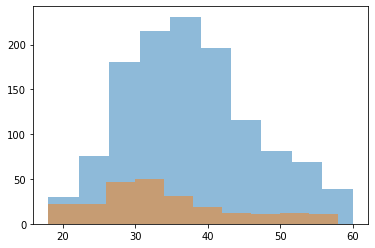

In [21]:
plt.hist(attritionNo['Age'], alpha = .5)
plt.hist(attritionYes['Age'], alpha = .5)
plt.show()

In [22]:
print(stats.describe(attritionNo['Age']))
print(stats.describe(attritionYes['Age']))

DescribeResult(nobs=1233, minmax=(18, 60), mean=37.561232765612324, variance=79.00294393360087, skewness=0.40762502727016825, kurtosis=-0.4150290002784116)
DescribeResult(nobs=237, minmax=(18, 58), mean=33.607594936708864, variance=93.88350139455052, skewness=0.7111944489883134, kurtosis=-0.08105741100884689)


In [23]:
# statistic is above 1.96 and the p-value is below .05 we will continue with Confidence Invterval 
stats.ttest_ind(attritionNo['Age'], attritionYes['Age'])

Ttest_indResult(statistic=6.1786638353072165, pvalue=8.356308021103649e-10)

In [24]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(attritionNo['Age'], attritionYes['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between -5.283273103983921 and -2.6240025538229994.'

At the 95% Confidence Interval employees who are not attriton has an age difference between 2 to 5 years of the average compared to employee who is likely to be attrition.


[[Text(0, 0, 'attritionNo'), Text(0, 0, 'attritionYes')]]

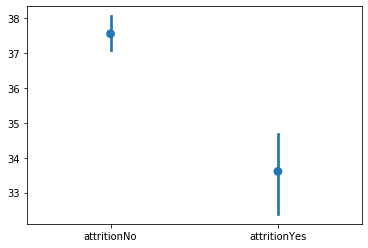

In [25]:
import seaborn as sns

g = sns.pointplot(data=[attritionNo['Age'],
                        attritionYes['Age']], join=False)
                        
g.set(xticklabels = ['attritionNo', 'attritionYes'])

Above is the age range on average compared to attrition. On average employees who are 35 years old and under tend to be attrition than those who are 37 years and above.
According to our visual inspection, ages are close enough to normally distributed for this reason we proceeded with the t-test.
The 95% confidence interval suggests that the difference in the average age between attrition and non attrition  is between 2 to 5 years.

Discussion and recommendation:
On average older employees are stable individuals who will remain at the company longer than younger employees. intrestenly, the more years an employee spend with current managers shows they stay longer. We suggest to have managers maintain positive relationship with employees and if hiring employees we suggest to target those who have more than 10 years of experience and at the age of 35 and above for more stability.